In [1]:
#dataset link: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [49]:
df=pd.read_csv("gld_price_data.csv")

In [50]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [51]:
df["Date"].describe()

count         2290
unique        2290
top       1/2/2008
freq             1
Name: Date, dtype: object

In [52]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [53]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [64]:
correlation=df.corr()
    

<AxesSubplot:>

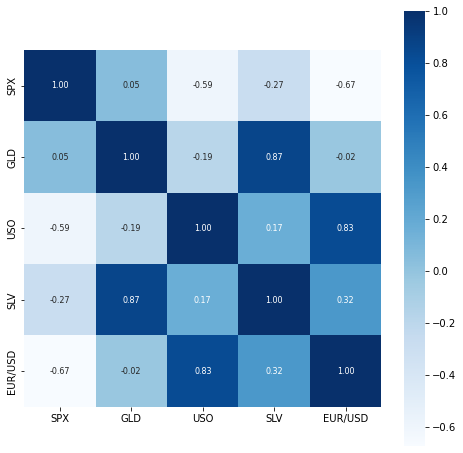

In [66]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8},cmap='Blues')

In [67]:
correlation['GLD']   # as we see gold and silver pos correlation

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\hsyn_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

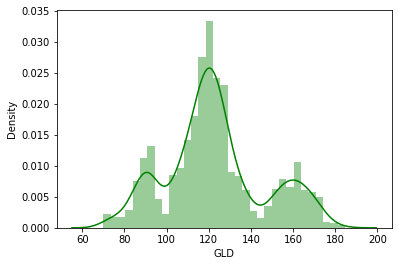

In [76]:
#checking the distrubition of the gold price
sns.distplot(df['GLD'],color='green' )

In [86]:
X=df.drop(['GLD','Date'],axis=1)
Y=df['GLD']


In [87]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

In [99]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)


In [100]:
#Rsquare eror
r2score=metrics.r2_score(Y_test,y_pred)
r2score

0.9887337387789107

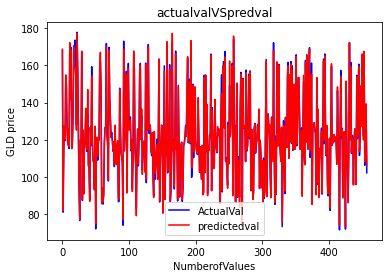

In [101]:
Y_test=list(Y_test)
plt.plot(Y_test, color='blue', label='ActualVal')
plt.plot(y_pred,color='red',label='predictedval')
plt.title('actualvalVSpredval')
plt.xlabel('NumberofValues')
plt.ylabel('GLD price')
plt.legend()
plt.show()